## Importing Necessary Libraries and Dependencies
---- 

In [1]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Filter warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data
---

In [2]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path("data/housing_California.csv")
house_file_df = pd.read_csv(file_path)

# # Display sample data
house_file_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## Get the dimensions of the DataFrame (number of rows and columns)
house_file_df.shape

(20640, 10)

In [4]:
# Overview of the dataset
house_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Summary statistics
house_file_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Check for missing or duplicate data
---

In [6]:
# Check for missing values in each column of the DataFrame
print(f"Total of missing values is {house_file_df.isnull().sum()}")

# Check for duplicate entries in the DataFrame
print(f"Total of duplicate entries is {house_file_df.duplicated().sum()}")

Total of missing values is longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total of duplicate entries is 0


## Handling Missing Values
---

The total_bedrooms column had 207 missing values, which could negatively affect the analysis and predictive modeling. To mitigate this issue, we filled the missing values using the column's mean. This approach preserves the dataset's completeness while minimizing the potential bias that could arise from removing rows or columns with missing data.

In [7]:
# Fill missing values in the 'total_bedrooms' column with the mean of the column
house_file_df['total_bedrooms'] = house_file_df['total_bedrooms'].fillna(house_file_df['total_bedrooms'].mean())

# Verify the total number of missing values in 'total_bedrooms' after filling
print(f"Total of missing values in 'total_bedrooms' after fillna is {house_file_df['total_bedrooms'].isnull().sum()}")

Total of missing values in 'total_bedrooms' after fillna is 0


## Plot histograms to visualize the distribution of values.
___

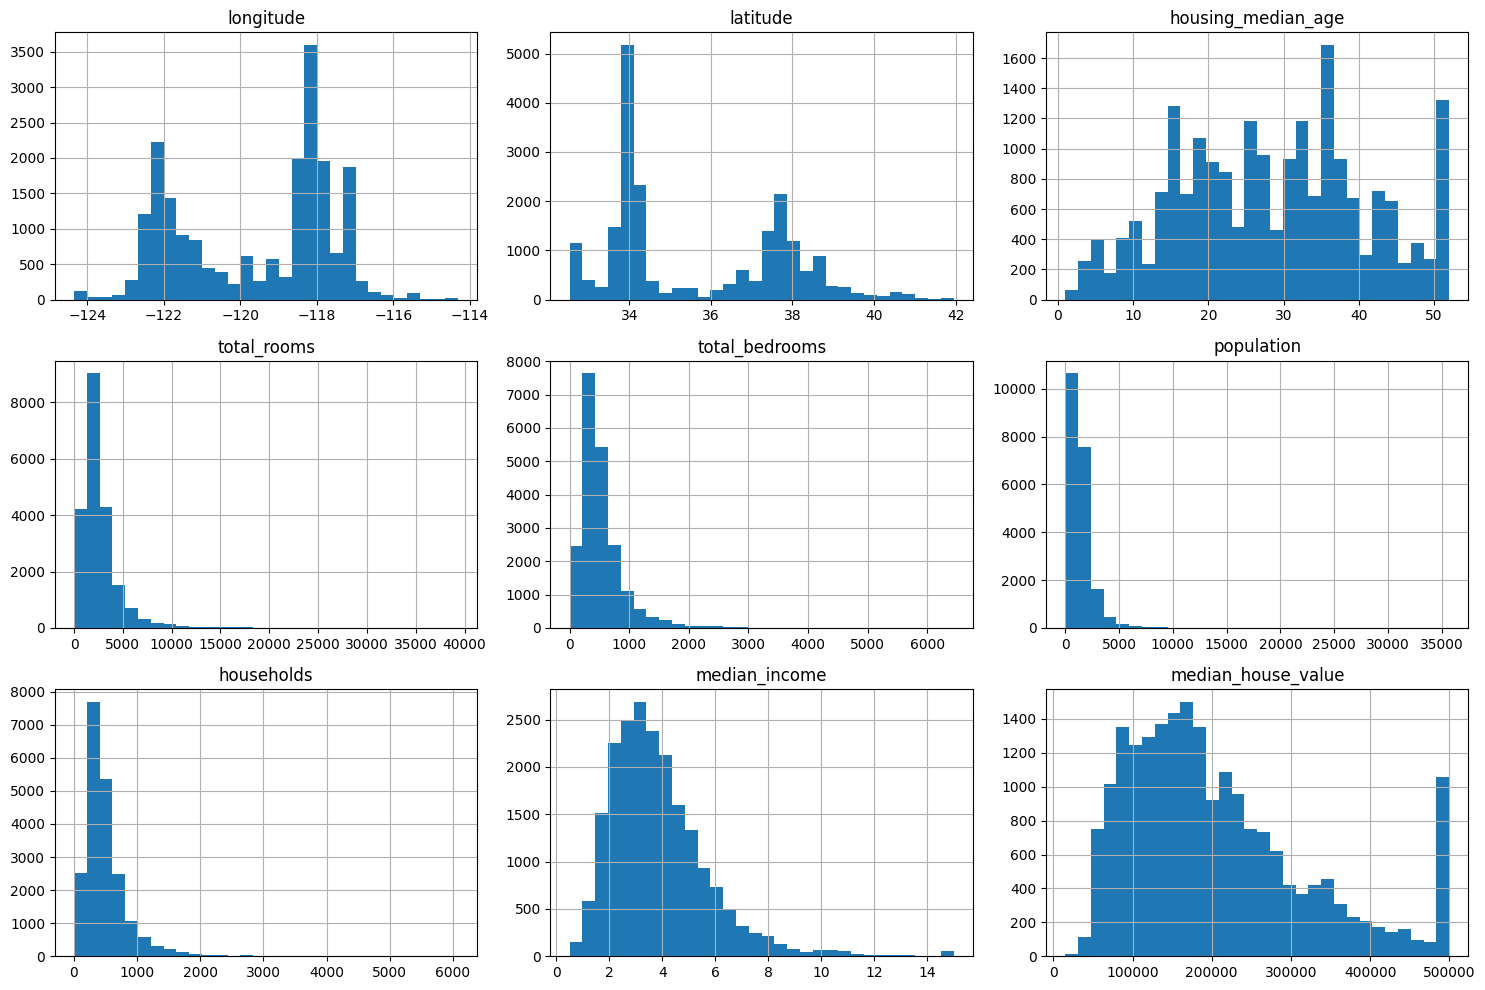

In [8]:
# Plot histograms
house_file_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### After analyzing the histograms, it is evident that many variables are right-skewed, with most of the data concentrated on the left and a long tail of higher values extending to the right. This skewness can negatively impact the model, as extreme values (outliers) may exert disproportionate influence on the predictions
---

## Box Plots to identify outliers 
---

Box plots are a valuable tool for visualizing data distribution and detecting outliers in our dataset. They provide a quick way to assess the presence of extreme values that could skew the analysis. This is especially important in the context of our housing price dataset, where outliers can greatly influence pricing trends and lead to misinterpretations.

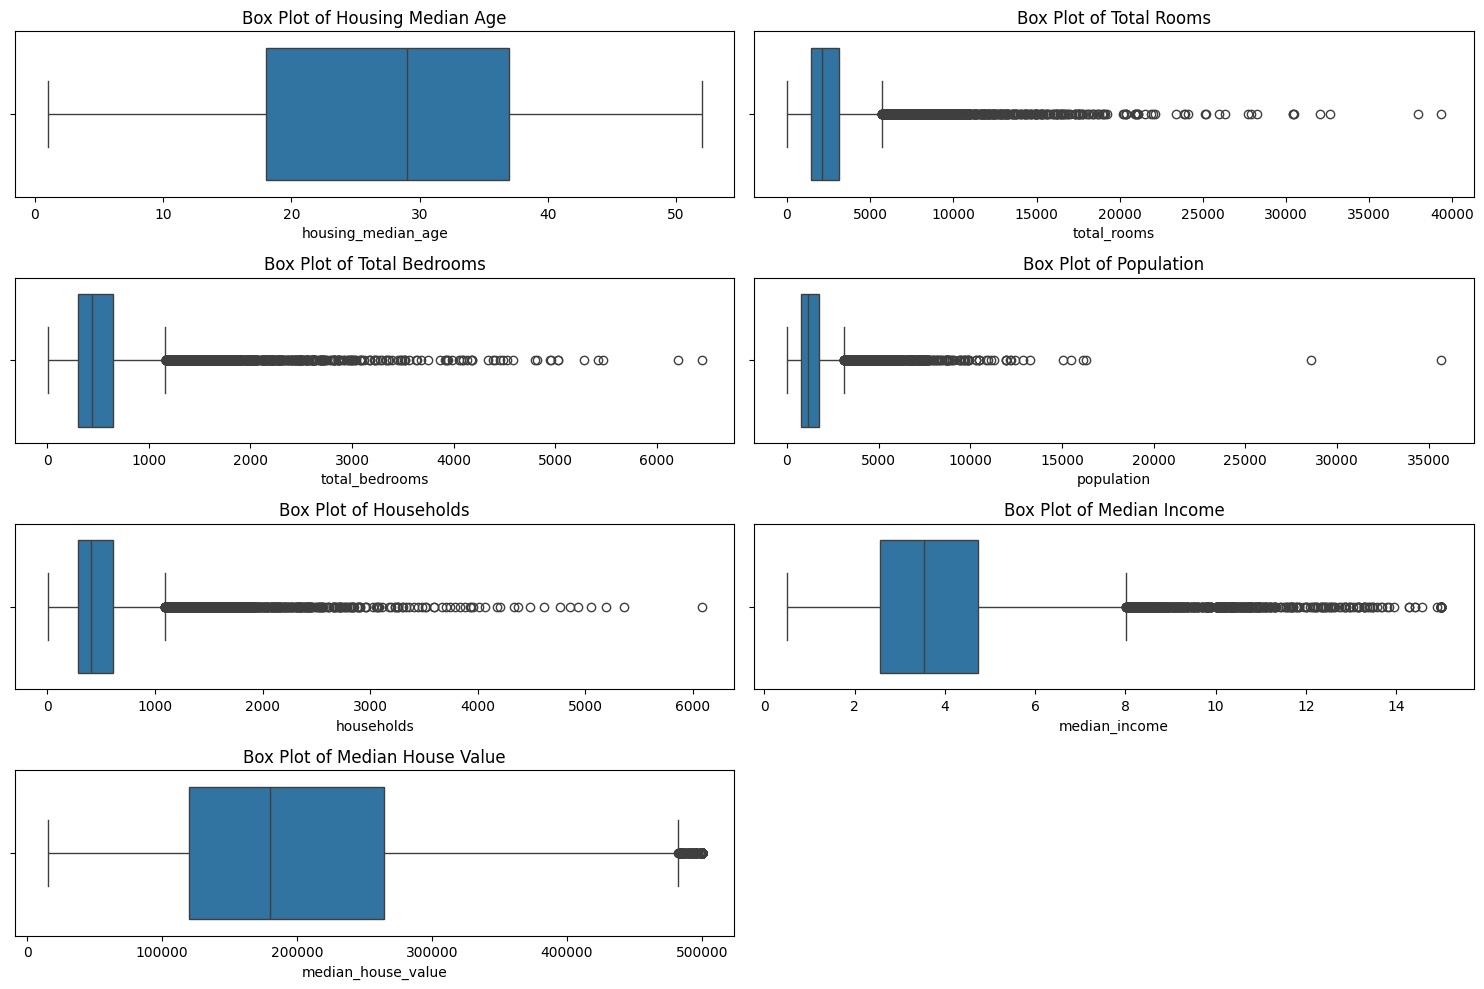

In [9]:
# Set the size of the entire figure
plt.figure(figsize=(15, 10))

# List of variables to plot
variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
             'population', 'households', 'median_income', 'median_house_value']

# Create subplots for each variable
for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sns.boxplot(x=house_file_df[var])
    plt.title(f'Box Plot of {var.replace("_", " ").title()}')
plt.tight_layout()

# Show the plots
plt.show()

## Transform "ocean_proximity" column with get_dummies
---

The categorical variable `ocean_proximity` was transformed into dummy variables using One-Hot Encoding. This conversion enables the model to interpret categorical data in a numerical format, which is essential for many machine learning algorithms to function properly.

In [10]:
# Copy dataset before change
house_df = house_file_df.copy()

ocean_proximity_counts = house_df['ocean_proximity'].value_counts()

# Exibir o resultado
print(ocean_proximity_counts)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [11]:
# Create dummy variables for the 'ocean_proximity' column to convert categorical data into numerical format
ocean_proximity_dummies = pd.get_dummies(house_df.ocean_proximity, prefix='prox_').astype(int)
ocean_proximity_dummies.head()

,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [12]:
# Concatenate the dummy variables to the original DataFrame 
house_df = pd.concat([house_df, ocean_proximity_dummies], axis=1)

# Remove the original 'ocean_proximity' column from the DataFrame
house_df.drop('ocean_proximity', axis=1, inplace=True)

# Verify the updated DataFrame with the new dummy variable columns
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Scatter Plot to Visualize the Geographic Distribution of Houses
---
A scatter plot was used to visualize the geographic distribution of houses based on their longitude and latitude coordinates. This visualization helps identify spatial patterns in the data, providing insights into how housing characteristics vary across different geographic locations.

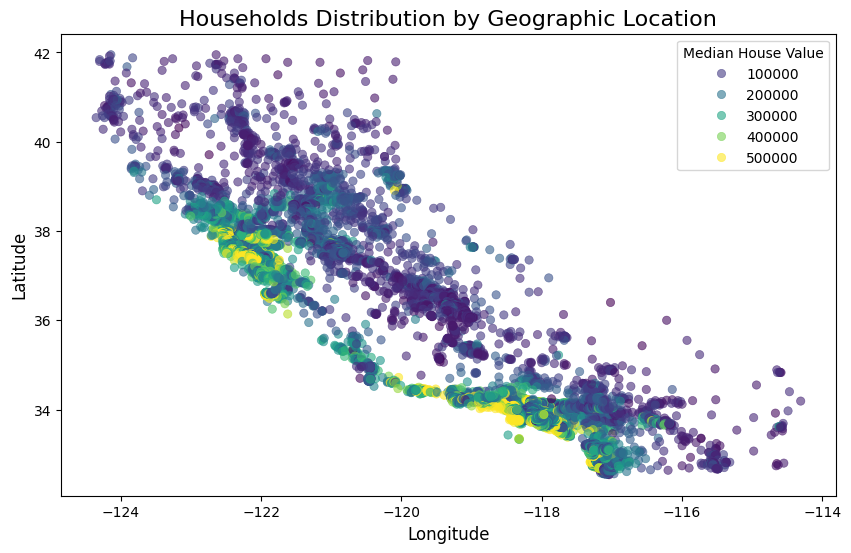

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Size
plt.figure(figsize=(10,6))

# Create scatter plot 
sns.scatterplot(x='longitude', y='latitude', 
                hue='median_house_value', palette='viridis', 
                data=house_df, alpha=0.6, edgecolor=None)

#  Add title
plt.title("Households Distribution by Geographic Location", size=16)
plt.xlabel("Longitude", size=12)
plt.ylabel("Latitude", size=12)

# Show legend
plt.legend(title='Median House Value')

# Show the plot
plt.show()

### The data aligns with our expectations: houses located closer to the ocean tend to be more expensive.
___


## Correlation Matrix to Visualize the Linear Relationships Between Variables
---
A correlation matrix was created to visualize the linear relationships between the variables in the dataset. This matrix helps identify how strongly different features are related to each other, which is useful for understanding which variables may have the most influence on the target variable and for detecting multicollinearity.

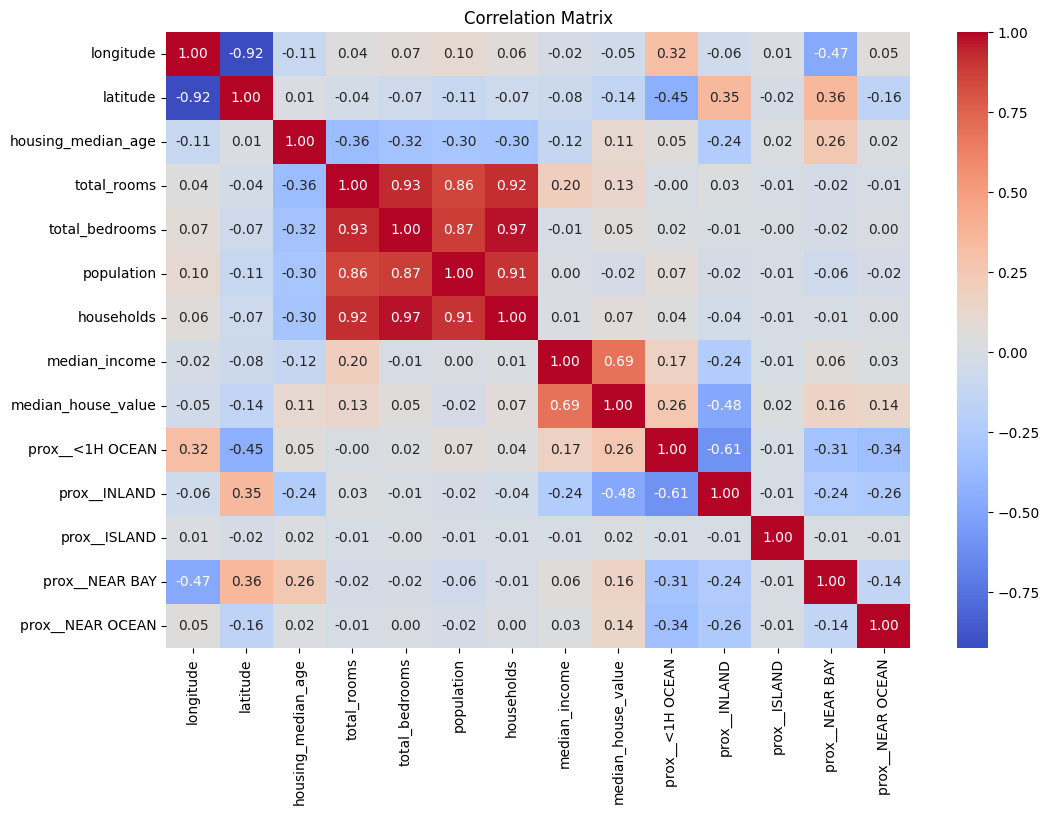

In [14]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(house_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Correlation Matrix - Observations
---

### Here is a preliminary analysis of how the features correlate with the target variable, median_house_value:

Median_income shows a strong positive correlation with median_house_value, which is expected since people with higher incomes can afford higher-priced homes.

The proximity feature, prox__<1H OCEAN (within 1 hour of the ocean), has a positive correlation with house prices, while prox__INLAND has a negative correlation. This aligns with our expectations, as houses farther from the ocean tend to be more affordable.

### Strong Positive Correlations:
- total_rooms and total_bedrooms (0.93): Homes with more rooms generally have more bedrooms.
- households and population (0.91): Areas with more households typically have a higher population.
- households and total_bedrooms (0.92): Regions with more households tend to have more bedrooms available.

### Factors that Increase House Value:
- median_income and median_house_value (0.69): Higher median incomes are associated with higher house prices.
- total_rooms and total_bedrooms (0.93): Having more rooms or bedrooms can increase the value of the home.

# Test Multicollinearity to Analyze the Correlation Between 'Total Bedrooms' and 'Total Rooms'
---

In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Copy of dataset
house_tests = house_df.copy() 

# Select the columns
features = house_tests[['total_bedrooms', 'total_rooms']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)  # High multicollinearity: A VIF greater than 5 or 10 usually indicates that the variable is strongly explained by the other

          Feature        VIF
0  total_bedrooms  17.527881
1     total_rooms  17.527881


# Results Interpretation
___

### High Multicollinearity
A Variance Inflation Factor (VIF) greater than 10 indicates significant multicollinearity, which can complicate the identification of each variable's individual contribution to the model. As shown in the results, both total_bedrooms and total_rooms have the same VIF value, indicating that they provide very similar information. This high multicollinearity can lead to unstable coefficients, making it harder to interpret the model results accurately.

### Removing total_rooms
Since total_bedrooms and total_rooms are highly correlated (with a correlation of 0.93), one of these variables needs to be removed to reduce multicollinearity. After careful analysis, we decided to remove total_rooms from the model because of its redundancy with total_bedrooms.

Total_bedrooms was considered more relevant, as it directly reflects the number of bedrooms in a house, an important factor in determining house value.

# T-Test to Check the Possibility of Creating a New Feature
___

T-Test to Check the Possibility of Creating a New Feature
As previously mentioned, total_bedrooms and total_rooms have a strong correlation. Before removing total_rooms, we explored the possibility of combining these two features into a new one, such as the proportion_of_bedrooms (i.e., the ratio of bedrooms to total rooms).

To test the significance of this new feature, I used the prox__<1H OCEAN variable, which is not correlated with total_bedrooms or total_rooms, but shows a significant correlation with the target variable, median_house_value. This allows us to assess the potential impact of the new feature without introducing multicollinearity, while still considering its relevance to house prices.

In [16]:
from scipy import stats

# Create new feature to test
house_tests['proportion_of_bedrooms'] = house_tests['total_bedrooms'] / house_tests['total_rooms']

# Defining the groups for the t-test
group1 = house_tests[house_tests['prox__<1H OCEAN'] == 1]['proportion_of_bedrooms']
group2 = house_tests[house_tests['prox__<1H OCEAN'] == 0]['proportion_of_bedrooms']

# Run the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f'T-statistic: {t_statistic}, P-value: {p_value}')

T-statistic: 8.650520060065388, P-value: 5.5293467948067296e-18


### Conclusion:

The T-test results reveal a significant difference in the average number of rooms between houses near the ocean and those further inland. The extremely low p-value (close to 0) confirms that this difference is highly statistically significant.

This suggests that by combining the features total_rooms and total_bedrooms into a new feature (e.g., proportion_of_bedrooms), we can effectively reduce multicollinearity and simplify the model without sacrificing valuable information.

---

In [17]:
# Copy of dataset
house_new_df= house_tests.copy()

# Drop the "total_rooms" colunm
house_new_df = house_new_df.drop('total_rooms', axis=1)
house_new_df.head()


,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN,proportion_of_bedrooms
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096


---

# Machine Learning
---

## Model : Random Forest Regressor
___

In [18]:
# Prepare the data
X = house_new_df.drop(columns=['median_house_value'], axis=1)  # Features
y = house_new_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
from sklearn.ensemble import RandomForestRegressor

#forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators

# ******      Hyperparameter Tuning:    ****** #
#forest_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42) 

forest_model = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)


forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

In [19]:
# Make predictions
y_pred = forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2513551012.51
R^2 Score: 0.81


In [20]:
# Testing
forest_model.score(X_test, y_test)

0.8081857607628739

## Data Quality - Overfitting ou Underfitting 

In [21]:
print(f'Training R²: {forest_model.score(X_train, y_train)}')
print(f'Test R²: {forest_model.score(X_test, y_test)}')

Training R²: 0.9377052713827959
Test R²: 0.8081857607628739


### Conclusion:
The model is generalizing well to the test data and does not seem to be suffering from significant overfitting or underfitting. The 13% difference between the training and test R² scores is reasonable and suggests that the model is robust.

___

## Cross-Validation

Implementing cross-validation allows for a more robust evaluation of the model. By partitioning the dataset into multiple folds, the model is trained and tested on different subsets of the data, ensuring that the evaluation is not overly dependent on any single train-test split. This method helps to assess the model’s performance more accurately and reduces the likelihood of overfitting or underfitting by averaging the results over multiple iterations.

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² scores: {scores}')
print(f'Mean R²: {scores.mean()}')

Cross-Validation R² scores: [0.81174858 0.80847624 0.81345281 0.81255822 0.80992621]
Mean R²: 0.8112324116170582


### Conclusion:

The cross-validation results indicate that the model performs consistently across different subsets of the training data, with an average R² of 0.8112. This further confirms the model's robustness and ability to generalize well. The minimal variation between the cross-validation scores and the test R² score suggests that the model is not overfitting and provides reliable predictions across various data splits.

---

### Feature Importance

Analyzing feature importance helps identify which features have the greatest influence in predicting house prices. By understanding the relative importance of each feature, we can gain insights into the key drivers of the model’s predictions. This information is useful not only for improving the model but also for interpreting and explaining the results in a more meaningful way.

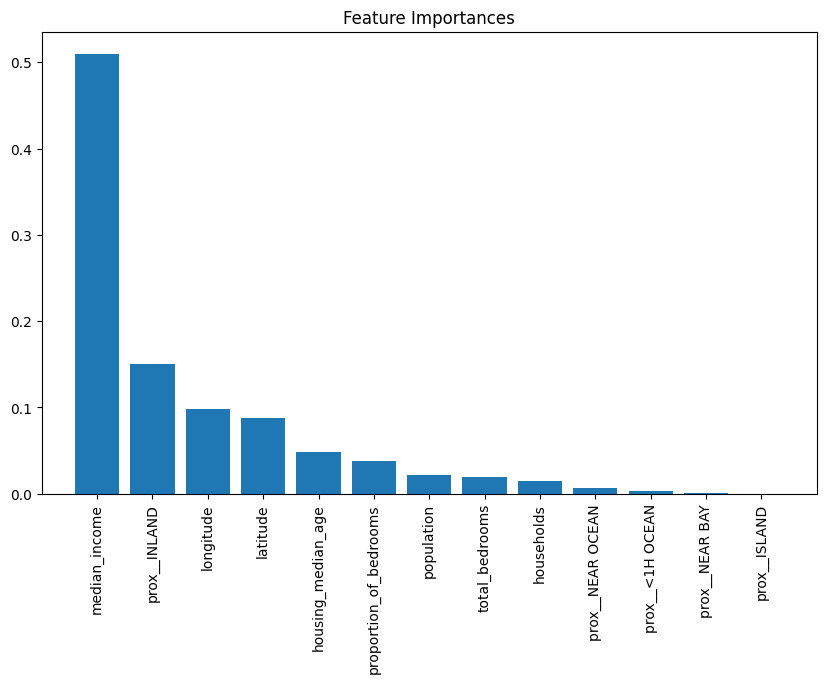

In [23]:
importances = forest_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# SCALING
---

In [24]:
house_train = house_new_df.copy()

from sklearn.model_selection import train_test_split

X = house_train.drop('median_house_value', axis=1)  # remover a coluna alvo
y = house_train['median_house_value']  # coluna alvo

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaled = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)

#### Fitting the Random Forest Model

In [26]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Predict using the unseen data
predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 2513551012.5077796
R²: 0.8081857607628739


### Actual vs Predicted values:

In [27]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

         Actual      Predicted
20046   47700.0   55394.973516
3024    45800.0   73541.901498
15663  500001.0  462481.659003
20484  218600.0  259725.093163
9814   278000.0  257175.955872
...         ...            ...
15362  263300.0  210144.483015
16623  266800.0  222850.403522
18086  500001.0  498581.358000
2144    72300.0   74449.167099
3665   151500.0  189918.303356

[4128 rows x 2 columns]


### MAE - Meam Absolute error:

The MAE value represents the average difference between the actual house values and the model's predictions


In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 32766.608767459184


### Cross-Validation
Implementing cross-validation can provide a more robust evaluation of your model:

In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)

print(f'Mean CV MSE: {mse_cv:.2f}')
print(f'Mean CV RMSE: {rmse_cv:.2f}')


Mean CV MSE: 5934382954.79
Mean CV RMSE: 77034.95


# RandomizedSearchCV


Validação Cruzada:

Teste diferentes combinações de hiperparâmetros usando validação cruzada com o GridSearchCV ou RandomizedSearchCV para buscar as melhores combinações:

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definir o modelo
forest_model = RandomForestRegressor(random_state=42)

# Definir o grid de parâmetros (faixas mais amplas)
param_dist = {
    'n_estimators': [100, 200, 300, 400],  # Faixa de árvores
    'max_depth': [10, 20, 30, None],  # Profundidade máxima
    'min_samples_split': [2, 5, 10],  # Mínimo para dividir
    'min_samples_leaf': [1, 2, 4],    # Mínimo em folha
    'bootstrap': [True, False]        # Se usar bootstrap
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest_model, 
                                   param_distributions=param_dist, 
                                   n_iter=10,  # Número de combinações a testar
                                   cv=5,       # Validação cruzada
                                   scoring='r2', 
                                   n_jobs=-1, 
                                   verbose=2, 
                                   random_state=42)

# Treinar o modelo com RandomizedSearchCV
random_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)

# Avaliar o modelo otimizado
best_forest_model = random_search.best_estimator_
y_pred = best_forest_model.predict(X_test)

# Calcular o R² do modelo otimizado
r2_optimized = r2_score(y_test, y_pred)
print(f'R^2 Score do modelo otimizado: {r2_optimized:.2f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  29.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  29.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  29.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  29.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  3